In [1]:
import xarray as xr

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

from bs_fdbck.constants import measurements_path, path_outdata, path_extract_latlon_outdata

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)


In [2]:
xr.set_options(keep_attrs=True) 

In [3]:
path_extract_latlon_outdata

PosixPath('/proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/extracted_latlon_subset')

In [4]:
lat_smr = 61.85
lon_smr = 24.28

In [5]:
case_name = 'OsloAero_intBVOC_f19_f19_mg17_full'

In [6]:
fn = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._2012-01-01-2015-01-01_concat_subs_22.0-30.0_60.0-66.0.nc'
fn_comb_lev1 = path_extract_latlon_outdata/ case_name/f'{case_name}.h1._2012-01-01-2015-01-01_concat_subs_22.0-30.0_60.0-66.0_lev1.nc'

In [7]:
fn2 = fn.parent / f'{fn.stem}_sort.nc'

In [8]:


cases = [case_name]

In [9]:
from pathlib import Path

In [10]:
plot_path = Path('Plots')

In [11]:
def make_fn(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_{case}_{_x}_{_y}.png'
    return plot_path /f

In [12]:
plot_path.mkdir(exist_ok=True, parents=True)

In [13]:
varl =['DOD500','DOD440','ACTREL','ACTNL','TGCLDLWP', #,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T','FCTL',
       'TOT_CLD_VISTAU','TOT_ICLD_VISTAU','TGCLDCWP',
       #'TAUTLOGMODIS',
       #'MEANTAU_ISCCP',
       #'LWPMODIS','CLWMODIS','REFFCLWMODIS',#'TAUTMODIS','TAUWMODIS',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [14]:
varl_st = [      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3']

## Load observations: 

## Open model dataset: 


In [15]:
model_lev_i=-1

In [16]:
ds_mod = xr.open_dataset(fn, chunks = {'time':48})#[fn1,fn2])#.sortby('time')
#ds_mod2 = xr.open_dataset(fn2, chunks = {'time':48})

In [17]:
ds_mod['TOT_ICLD_VISTAU_s']= ds_mod['TOT_ICLD_VISTAU'].sum('lev')
ds_mod['TOT_CLD_VISTAU_s']= ds_mod['TOT_CLD_VISTAU'].sum('lev')

ds_mod = ds_mod.sortby('time')#.sel(time=slice('2012','2014'))



In [18]:
ds_mod = ds_mod.isel(lev = model_lev_i)

ds_mod1

In [16]:
import dask.array as da
from dask.diagnostics import ProgressBar

In [ ]:
delayed_obj = ds_mod.to_netcdf(fn_comb_lev1, compute=False)
with ProgressBar(): 
    results = delayed_obj.compute()

[##################################      ] | 85% Completed | 36min 20.6s

delayed_obj = ds_mod1.to_netcdf(fn1_2, compute=False)
with ProgressBar():
    results = delayed_obj.compute()
    
    

delayed_obj = ds_mod2.to_netcdf(fn2_2, compute=False)
with ProgressBar():
    results = delayed_obj.compute()

ds_mod = xr.open_mfdataset([fn1_2,fn2_2], combine='by_coords', concat_dim='time')

In [17]:
ds_mod = xr.open_dataset(fn_comb_lev1)

Somehow unsorted

In [18]:
#ds_mod = ds_mod.sortby('time')[varl]

In [19]:
ds_all = ds_mod

In [20]:
ds_all[varl]

<xarray.Dataset>
Dimensions:          (time: 26448, lat: 3, lon: 4)
Coordinates:
  * lat              (lat) float64 61.58 63.47 65.37
    lev              float64 ...
  * lon              (lon) float64 22.5 25.0 27.5 30.0
  * time             (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:00:00
Data variables: (12/35)
    DOD500           (time, lat, lon) float32 ...
    DOD440           (time, lat, lon) float32 ...
    ACTREL           (time, lat, lon) float32 ...
    ACTNL            (time, lat, lon) float32 ...
    TGCLDLWP         (time, lat, lon) float32 ...
    H2SO4            (time, lat, lon) float32 ...
    ...               ...
    BC_AC            (time, lat, lon) float32 ...
    SS_A1            (time, lat, lon) float32 ...
    SS_A2            (time, lat, lon) float32 ...
    SS_A3            (time, lat, lon) float32 ...
    DST_A2           (time, lat, lon) float32 ...
    DST_A3           (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Mar 17 10:10:51 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

### Select hyytiala grid cell: 

We use only hyytiala for org etc, but all grid cells over finland for cloud properties

ds_mod['TOT_ICLD_VISTAU_s']= ds_mod['TOT_ICLD_VISTAU'].sum('lev')
ds_mod['TOT_CLD_VISTAU_s']= ds_mod['TOT_CLD_VISTAU'].sum('lev')


model_lev_i=-1
ds_sel = ds_mod.sel(lat = lat_smr, lon= lon_smr, method='nearest').isel( lev=model_lev_i)#.load()
ds_all = ds_mod.isel(lev=model_lev_i)#.load()

#ds_sel.load()
#ds_all.load()

ds_all.to_netcdf(fn_comb_lev1)

In [21]:
model_lev_i=-1

In [22]:
ds_all = xr.open_dataset(fn_comb_lev1).isel(ilev=model_lev_i)
ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( ilev=model_lev_i)#.load()

In [23]:
ds_mod = ds_all

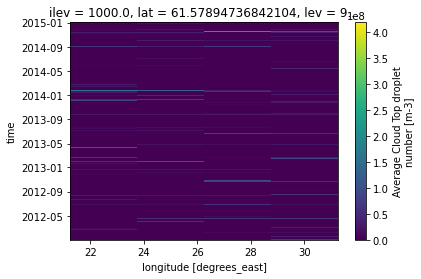

In [ ]:
ds_all['ACTNL'].isel(lat=0).plot()

In [29]:
ds_mod

<xarray.Dataset>
Dimensions:              (time: 26448, lat: 3, lon: 4, cosp_prs: 7, cosp_tau_modis: 7, cosp_reffice: 6, cosp_reffliq: 6, cosp_dbze: 15, nbnd: 2, cosp_ht: 40, cosp_htmisr: 16, cosp_scol: 10, cosp_sr: 15, cosp_sza: 5, cosp_tau: 7)
Coordinates: (12/16)
  * cosp_dbze            (cosp_dbze) float64 -72.5 -42.5 -37.5 ... 17.5 50.0
  * cosp_ht              (cosp_ht) float64 1.896e+04 1.848e+04 ... 720.0 240.0
  * cosp_htmisr          (cosp_htmisr) float64 0.0 250.0 ... 1.6e+04 1.8e+04
  * cosp_prs             (cosp_prs) float64 9e+04 7.4e+04 ... 2.45e+04 9e+03
  * cosp_reffice         (cosp_reffice) float64 5e-06 1.5e-05 ... 5e-05 7.5e-05
  * cosp_reffliq         (cosp_reffliq) float64 4e-06 9e-06 ... 1.75e-05 2.5e-05
    ...                   ...
  * cosp_tau_modis       (cosp_tau_modis) float64 0.15 0.8 2.45 ... 41.5 100.0
    ilev                 float64 1e+03
  * lat                  (lat) float64 61.58 63.47 65.37
    lev                  float64 992.6
  * lon                  (lon) float64 22.5 25.0 27.5 30.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:0...
Dimensions without coordinates: nbnd
Data variables: (12/224)
    AB550DRY             (time, lat, lon) float32 ...
    ABS440               (time, lat, lon) float32 ...
    ABS500               (time, lat, lon) float32 ...
    ABS550               (time, lat, lon) float32 ...
    ABSDRYOC             (time, lat, lon) float32 ...
    ABSDRYSS             (time, lat, lon) float32 ...
    ...                   ...
    nsteph               (time) int32 17568 17570 17572 ... 70170 70172 70174
    sol_tsi              (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time, nbnd) datetime64[ns] 2012-01-01T23:00:00 ... ...
    time_written         (time) |S8 b'10:10:51' b'10:10:51' ... b'10:12:27'
    TOT_ICLD_VISTAU_s    (time, lat, lon) float32 ...
    TOT_CLD_VISTAU_s     (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Mar 17 10:10:51 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

### Broadcast ds_sel to same grid 

In [30]:
ds_mod = ds_mod.isel(#ilev=-1,
                     cosp_tau_modis=0,  
                                                                        cosp_tau=0,
                                                                       cosp_dbze=0,
                                                                        cosp_ht=0, 
                                                                        cosp_prs = 0,
                                                                       cosp_reffice=0,
                                                                        cosp_htmisr=0,
                                                                        cosp_reffliq=0,
                                                                        cosp_scol=0,
                                                                        cosp_sr=0,
                                                                        cosp_sza=0,
                                                                        nbnd=0
                                                                       ).squeeze()

In [40]:
dic_ds=dict()
dic_ds[case_name]= ds_mod
ds_all = ds_mod

In [41]:
ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')

In [42]:
ds_all = ds_mod#.squeeze()

In [45]:
ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')

<xarray.Dataset>
Dimensions:              (time: 26448)
Coordinates: (12/16)
    cosp_dbze            float64 -72.5
    cosp_ht              float64 1.896e+04
    cosp_htmisr          float64 0.0
    cosp_prs             float64 9e+04
    cosp_reffice         float64 5e-06
    cosp_reffliq         float64 4e-06
    ...                   ...
    cosp_tau_modis       float64 0.15
    ilev                 float64 1e+03
    lat                  float64 61.58
    lev                  float64 992.6
    lon                  float64 25.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:0...
Data variables: (12/224)
    AB550DRY             (time) float32 ...
    ABS440               (time) float32 ...
    ABS500               (time) float32 ...
    ABS550               (time) float32 ...
    ABSDRYOC             (time) float32 ...
    ABSDRYSS             (time) float32 ...
    ...                   ...
    nsteph               (time) int32 17568 17570 17572 ... 70170 70172 70174
    sol_tsi              (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time) datetime64[ns] 2012-01-01T23:00:00 ... 2015-0...
    time_written         (time) |S8 b'10:10:51' b'10:10:51' ... b'10:12:27'
    TOT_ICLD_VISTAU_s    (time) float32 ...
    TOT_CLD_VISTAU_s     (time) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Mar 17 10:10:51 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [46]:
ds_sel

<xarray.Dataset>
Dimensions:              (time: 26448)
Coordinates: (12/16)
    cosp_dbze            float64 -72.5
    cosp_ht              float64 1.896e+04
    cosp_htmisr          float64 0.0
    cosp_prs             float64 9e+04
    cosp_reffice         float64 5e-06
    cosp_reffliq         float64 4e-06
    ...                   ...
    cosp_tau_modis       float64 0.15
    ilev                 float64 1e+03
    lat                  float64 61.58
    lev                  float64 992.6
    lon                  float64 25.0
  * time                 (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:0...
Data variables: (12/224)
    AB550DRY             (time) float32 0.002569 0.002747 ... 0.001729 0.001697
    ABS440               (time) float32 0.003174 0.003396 ... 0.002142 0.002101
    ABS500               (time) float32 0.002822 0.00302 ... 0.001899 0.001863
    ABS550               (time) float32 0.002613 0.002797 ... 0.001753 0.001719
    ABSDRYOC             (time) float32 2.561e-07 2.54e-07 ... 2.665e-08
    ABSDRYSS             (time) float32 1.488e-09 1.622e-09 ... 6.561e-11
    ...                   ...
    nsteph               (time) int32 17568 17570 17572 ... 70170 70172 70174
    sol_tsi              (time) float64 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    time_bnds            (time) datetime64[ns] 2012-01-01T23:00:00 ... 2015-0...
    time_written         (time) |S8 b'10:10:51' b'10:10:51' ... b'10:12:27'
    TOT_ICLD_VISTAU_s    (time) float32 ...
    TOT_CLD_VISTAU_s     (time) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              OsloAero_intBVOC_f19_f19_mg17_full
    logname:           x_sarbl
    host:              
    initial_file:      OsloAero_intBVOC_f19_f19_spinup.cam.i.2011-01-01-00000.nc
    topography_file:   /proj/cesm_input-data/inputdata/noresm-only/inputForNu...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1
    history:           Thu Mar 17 10:10:51 2022: ncrcat /proj/bolinc/users/x_...
    NCO:               netCDF Operators version 4.7.9 (Homepage = http://nco....

In [38]:
ds_1, ds_2 =xr.broadcast(ds_sel, ds_all)
for v in varl_st:
    ds_all[v] = ds_1[v]

KeyboardInterrupt: 

In [ ]:
ds_all

### Set dic_ds : 

In [ ]:
dic_ds = dict()
dic_ds[case_name] =ds_all

Constants:

In [ ]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [ ]:
ds_all.load()

In [ ]:
def get_dic_df_mod(model_lev_i=-1):
    


    dic_df = dict()
    dic_df_sm = dict()

    for ca in dic_ds.keys():
        ds = dic_ds[ca]
        #ds['TOT_ICLD_VISTAU_s']= ds['TOT_ICLD_VISTAU'].sum('lev')
        #ds['TOT_CLD_VISTAU_s']= ds['TOT_CLD_VISTAU'].sum('lev')
        for v in ['TGCLDLWP','TGCLDIWP','TGCLDCWP']:
            if v in ds.data_vars:
                if ds[v].attrs['units'] =='kg/m2':
                    ds[v] = ds[v]*1000
                    ds[v].attrs['units'] = 'g/m2'
                
        
        ds_sel = ds.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( lev=model_lev_i)

        ds_all = ds#.isel(lev=model_lev_i)
        #ds_sel =ds_sel[varl_st]
        ds_1, ds_2 =xr.broadcast(ds_sel, ds_all)
        for v in varl_st:
            ds_all[v] = ds_1[v]
        ds_sel = ds_all
        print(ds_all)
        
        rho = pressure*100/(R*ds_sel['T'])

        ds_sel['rho'] = rho
        ds_sel['ACTNL_incld'] = ds_sel['ACTNL']/ds_sel['FCTL']
        ds_sel['ACTREL_incld'] = ds_sel['ACTREL']/ds_sel['FCTL']

        ds_sel['ACTNL_incld'].plot()

        ds_sel_median = ds_sel.resample({'time':'D'}).median()


        #df = ds_sel_median.to_dataframe()

        ls_so4 = [c for c in ds_sel_median.data_vars if 'SO4_' in c]#['SO4_NA']

        ls_so4

        for s in ['SOA_NA','SOA_A1','OM_AC','OM_AI','OM_NI']+ls_so4:
            un = '$\micro$g/m3'
            if ds_sel_median[s].attrs['units']!=un:
                ds_sel_median[s] = ds_sel_median[s]*ds_sel_median['rho']*kg2ug
                ds_sel_median[s].attrs['units']=un
        #ds_sel_med= ds_sel_median.resample(time='D').median()

        df = ds_sel_median.to_dataframe()
        df = df.drop([co for co in df.columns if (('lat_' in co)|('lon_' in co))], 
                     axis=1)

        df['SOA'] = df['SOA_NA'] + df['SOA_A1']

        df['OA'] = df['SOA_NA'] + df['SOA_A1'] +df['OM_AC']+df['OM_AI']+df['OM_NI']
        df['POA'] = df['OM_AC']+df['OM_AI']+df['OM_NI']
    
        df['SO4']=0
        for s in ls_so4:
            print(s)
            
            print(df[s].mean())
            df['SO4'] = df['SO4'] + df[s]
        
        df['ACTNL_incld'] = df['ACTNL']/df['FCTL']
        df['ACTREL_incld'] = df['ACTREL']/df['FCTL']
        
    
        df_daily = df#.resample('D').median()

        months = (df.index.get_level_values(0).month==7 )|(df.index.get_level_values(0).month==8  )

        df_s = df_daily[months]
        df_s.loc[:,'year'] = df_s.index.get_level_values(0).year.values

        df_s.loc[:,'T_C'] = df_s['T'].values-273.15
        #df_s.index = df_s.index.rename('date')
        df_merge = df_s#pd.merge(df_s, df_hyy_1, right_on='date', left_on='date')
        
        df_merge['year'] = df_merge.index.get_level_values(0).year

        
        dic_df[ca] = df_merge
        print(ca)
    
        months = (df.index.get_level_values(0).month==7 )|(df.index.get_level_values(0).month==8  )

        df_s = df[months]
        ds_month_mask = ds_sel.where((ds_sel['time.month']==7) | (ds_sel['time.month']==8))
        ds_sel_med_y= ds_month_mask.resample(time='Y').median()
        df_ym =ds_sel_med_y.to_dataframe()
        #df_ym = df_s.resample('Y').median()
        #df_ym.loc[:,'year'] = df_ym.index.year.values

        df_ym.loc[:,'T_C'] = df_ym['T'].values-273.15
        
        dic_df_sm[ca] = df_merge
        print(ca)

    return dic_df_sm, dic_df


dic_df_sm, dic_df = get_dic_df_mod(model_lev_i=-1)

Copying the same for as hyytiala for all grid cells for the station variables (st measurements) 

In [49]:
ds_sel = ds_all.sel(lat = lat_smr, lon= lon_smr, method='nearest')#.isel( ilev=model_lev_i)#.load()

In [ ]:
ds_all

In [52]:
ds_sel

KeyboardInterrupt: 

In [50]:
ds_1, ds_2 =xr.broadcast(ds_sel, ds_all)
for v in varl_st:
    ds_all[v] = ds_1[v]

KeyboardInterrupt: 

In [ ]:
ds_sel

In [ ]:
ds_all['SOA_NA']#.isel(lat=0).plot()

In [ ]:
dic_df_sm[case_name].columns

In [ ]:
df_mod = dic_df_sm[case_name]

In [ ]:
df_mod.index.get_level_values(1)

In [ ]:
mask_liq_cloudtop = df_mod['FCTL']>0.0001

In [ ]:
df_mod['mask_liq_cloudtop'] = mask_liq_cloudtop

In [ ]:
sel_latlon = (df_mod.index.get_level_values(2)==27.5)&(df_mod.index.get_level_values(1)==61.57894736842104)

df_mod[sel_latlon].reset_index().set_index('time')['TGCLDLWP'].plot()

In [ ]:
df_mod[mask_liq_cloudtop].reset_index().set_index('time')['FCTL'].plot()#ylim=[-.0,.01])

#### Mask values that don't have cloud top liquid

In [ ]:
df_mod = df_mod[df_mod['mask_liq_cloudtop']]

In [ ]:
df_mod['CWP_qcut']=pd.qcut(df_mod['TGCLDLWP'],6)# bins=bins, labels=labels)§

df_mod['CWP_qcutl'] = df_mod['CWP_qcut'].apply(lambda x:x.mid)



In [ ]:
bins = pd.IntervalIndex.from_breaks([ 10,  30,  50,  70, 90, 110, 130,500])


df_mod['CWP_cut']=pd.cut(df_mod['TGCLDLWP'], bins=bins)#, labels=labels)

df_mod['CWP_cutl'] = df_mod['CWP_cut'].apply(lambda x:x.mid)

## Category of OA concentration

In [ ]:
df_mod['OA_low'] = df_mod['OA']<df_mod['OA'].quantile(.34)
df_mod['OA_high']= df_mod['OA']>df_mod['OA'].quantile(.66)

In [ ]:
#df_mod['OA_low'].loc[:,:] = df_mod['OA']<df_mod['OA'].quantile(.34)
mid_range = ( df_mod['OA'].quantile(.34)<df_mod['OA']) & (df_mod['OA']<df_mod['OA'].quantile(.66))
df_mod['OA_mid_range'] = mid_range

In [ ]:

df_mod=df_mod.assign(OA_category= pd.NA)
df_mod.loc[df_mod['OA_high'], 'OA_category'] = 'OA high'
df_mod.loc[df_mod['OA_low'], 'OA_category'] = 'OA low'



In [ ]:
df_mod[(df_mod.index.get_level_values('lat') >65)& (df_mod.index.get_level_values('lon') == 25.0)]

In [ ]:
import seaborn as sns

In [ ]:
_df = (df_mod[(df_mod['OA_category'].notna()) & (df_mod['TOT_ICLD_VISTAU_s']>0)])
_df = _df[_df['TOT_ICLD_VISTAU_s']<50]
sns.displot(#x='TGCLDLWP', 
            x='TOT_ICLD_VISTAU_s',
            data=_df,
            hue='OA_category',
           #kind='swarm'
           )
#plt.ylim([0,250])
print(len(df_mod[df_mod['OA_category'].notna()]))

In [ ]:
sns.displot(#x='TGCLDLWP', 
            x='ACTNL_incld',
            data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            hue='OA_category',
           #kind='swarm'
           )
#plt.ylim([0,250])

In [ ]:
import seaborn as sns

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            #data=df_mod.reset_index(),
            #data=df_mod[~df_mod['OA_mid_range']].reset_index(),
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
           kind='swarm'
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_ICLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='boxen',
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_ICLD_VISTAU_s',
            #data=df_mod.reset_index(),
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
           kind='swarm'
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_CLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue ='OA_category',
            kind='violin',
            hue_order=['OA low','OA high'],
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='TOT_CLD_VISTAU_s',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue ='OA_category',
            kind='swarm',
            hue_order=['OA low','OA high'],
           )
#plt.ylim([0,250])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),

            hue='OA_category',
           # kind='box'
           )

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTNL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),

            hue='OA_category',
            kind='violin'
           )

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTREL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='boxen',
           )
plt.ylim([0,25])

In [ ]:
sns.catplot(x='CWP_cutl', 
            y='ACTREL_incld',
            data=df_mod[df_mod['OA_category'].notna()].reset_index(),
            hue_order=['OA low','OA high'],

            hue='OA_category',
            kind='swarm',
           )
plt.ylim([0,25])